In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
df=pd.read_csv('bike_sharing_rental.csv')
df

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


# Part A.

Text(0, 0.5, 'Count of Total Tikes')

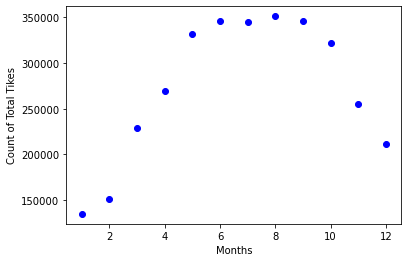

In [2]:
a=(df.groupby('mnth')['cnt'].sum()).to_numpy()

plt.plot(range(1,13),a,'bo')
plt.xlabel('Months')
plt.ylabel('Count of Total Tikes')

Text(0, 0.5, 'Count of Total Tikes')

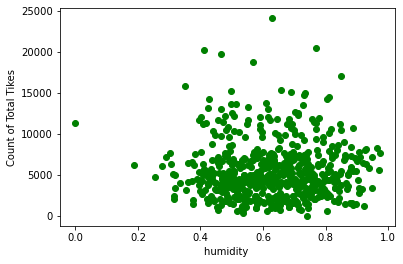

In [3]:
a=(df.groupby('hum')['cnt'].sum()).to_numpy()
b=df['hum'].values.tolist()
b=list(dict.fromkeys(b))
plt.plot(b,a,'go')
plt.xlabel('humidity ')
plt.ylabel('Count of Total Tikes')

# Part B.

In [4]:
a=df.groupby('temp')['cnt'].mean()
Temp=a.idxmax()
maxTemp=41*Temp
print(f'Normalized Temperature of Maximum Requests is {Temp}')
print(f'Temperature of Maximum Requests is {maxTemp}')

Normalized Temperature of Maximum Requests is 0.601667
Temperature of Maximum Requests is 24.668346999999997


# Part C.

In [5]:
X=df[['season', 'yr' ,'mnth' ,'holiday', 'weekday', 'workingday', 'weathersit' ,'temp', 'atemp', 'hum', 'windspeed' ]]
Y=df[['cnt']]

In [6]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=36)

In [7]:
reg=linear_model.LinearRegression()
x=np.asanyarray(X_train)
y=np.asanyarray(y_train)
reg.fit (x, y)
MSE_train=np.mean((y_train - y) ** 2)
print ('Coefficients: ', reg.coef_)

Coefficients:  [[  489.68326245  2038.77623466   -40.17249521  -778.68357863
     60.99107582    69.25761465  -613.80856532  2225.00433426
   3250.33469475 -1067.51765288 -2614.42462837]]


In [8]:
y_hat_train=reg.predict(X_train)
y=np.asanyarray(y_train)
MSE_train=np.mean((y_hat_train - y) ** 2)
print(f'MSE of train data is : {MSE_train}')

MSE of train data is : 804813.0297724248


In [9]:
y_hat_test=reg.predict(X_test)
x=np.asanyarray(X_test)
y=np.asanyarray(y_test)
MSE_test=np.mean((y_hat_test - y) ** 2)
print(f'MSE of test data is: {MSE_test}')

MSE of test data is: 547574.8967369553
